In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file -- First column is index
df = pd.read_csv("Data/Spectral_Soft_Sensor_1.csv", index_col=0)
print(f"Dimensions:")
print(f"Rows = {df.shape[0]} observations")
print(f"Columns = {df.shape[1]} variables")

Dimensions:
Rows = 12180 observations
Columns = 1741 variables


In [3]:
df.head(20)

,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,NaN,NaN,NaN,0.091526,NaN,NaN,34.047382,NaN,10.889923,NaN,...,0.035515,0.035214,0.034912,0.034611,0.034310,0.034008,0.033707,0.033405,0.033104,0.032803
1,NaN,NaN,NaN,0.038488,NaN,NaN,23.320021,NaN,10.270048,NaN,...,0.047333,0.047102,0.046871,0.046640,0.046409,0.046178,0.045947,0.045716,0.045485,0.045254
2,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,0.027101,0.026860,0.026619,0.026379,0.026138,0.025897,0.025656,0.025415,0.025174,0.024933
3,NaN,NaN,NaN,0.013190,NaN,NaN,27.638014,NaN,13.132381,NaN,...,0.038942,0.038526,0.038110,0.037694,0.037278,0.036862,0.036446,0.036030,0.035614,0.035198
4,NaN,NaN,NaN,0.082163,NaN,NaN,23.159727,NaN,11.625371,NaN,...,0.049960,0.049475,0.048989,0.048504,0.048019,0.047534,0.047048,0.046563,0.046078,0.045593
5,NaN,NaN,NaN,0.022024,NaN,NaN,20.810395,NaN,10.573226,NaN,...,0.029485,0.028949,0.028413,0.027878,0.027342,0.026807,0.026271,0.025736,0.025200,0.024665
6,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,0.027101,0.026860,0.026619,0.026379,0.026138,0.025897,0.025656,0.025415,0.025174,0.024933
7,NaN,NaN,NaN,0.099728,NaN,NaN,42.224701,NaN,15.882364,NaN,...,0.016490,0.016190,0.015890,0.015590,0.015290,0.014990,0.014690,0.014390,0.014090,0.013790
8,NaN,NaN,NaN,0.017747,NaN,NaN,26.448420,NaN,7.577363,NaN,...,0.038179,0.037800,0.037421,0.037042,0.036664,0.036285,0.035906,0.035528,0.035149,0.034770
9,NaN,NaN,NaN,0.019997,NaN,NaN,18.708539,NaN,5.814840,NaN,...,0.053531,0.052945,0.052358,0.051772,0.051186,0.050600,0.050014,0.049428,0.048842,0.048256


In [4]:
# Determine where traits end, and bands start
df.columns[19:21] 


Index(['Sulfur content (mg/cm²)', '400'], dtype='object')

In [5]:
df.columns[-1]

'2450'

**Note:** The dataset begins with trait-related variables, followed by spectral bands starting at column 21, covering the wavelength range from 400 to 2450 nm.(although the description says that wavelengths are ranging from 450 to 2500 nm)  

**Note:** In this dataset, band names directly represent wavelengths in nanometers (e.g., "450" = 450 nm),so there is no need to map band numbers to wavelength values separately.

In [6]:
# Split variables as traits and bands
traits = df.columns[:20]
bands = df.columns[20:]

# We can conclude that there are;
print(f"Number of Observations: {df.shape[0]}")
print(f"Number of Traits: {len(traits)}")
print(f"Wavelength range: {bands[0]} - {bands[-1]}")# range = wavelength in this dataset

Number of Observations: 12180
Number of Traits: 20
Wavelength range: 400 - 2450


In [7]:
# Missing value analysis for traits
traits_null_counts = df[traits].isnull().sum()
traits_null_pct = df[traits].isnull().mean() * 100

trait_missing = pd.DataFrame({
    'Trait': traits,
    'MissingCount': traits_null_counts.values,
    'MissingPercent': traits_null_pct.values.round(2)
}).sort_values(by='MissingCount', ascending=False)

print(trait_missing)

                           Trait  MissingCount  MissingPercent
0   Anthocyanin content (μg/cm²)         11614           95.35
14    Manganese content (mg/cm²)          8833           72.52
18    Potassium content (mg/cm²)          8786           72.13
19       Sulfur content (mg/cm²)          8530           70.03
10                   LAI (m²/m²)          8470           69.54
3            Ca content (mg/cm²)          8465           69.50
1         Boron content (mg/cm²)          8366           68.69
16                  NSC (mg/cm²)          8351           68.56
7        Copper content (mg/cm²)          8316           68.28
13    Magnesium content (mg/cm²)          8263           67.84
17   Phosphorus content (mg/cm²)          8187           67.22
9                 Fiber (mg/cm²)          7983           65.54
5             Cellulose (mg/cm²)          7918           65.01
4    Carotenoid content (μg/cm²)          7916           64.99
12               Lignin (mg/cm²)          7872         

**Note**: This table will be important in the following steps, as we will need to select five traits.

In [8]:
# Check how many spectral bands are completely empty
bands_null_counts = df[bands].isnull().sum()

fully_missing_bands = (bands_null_counts == df.shape[0]).sum()
print(f"Number of completely missing bands: {fully_missing_bands}")

Number of completely missing bands: 0


**Note:** There are no missing bands

In [9]:
# Summary for traits
trait_stats = df[traits].describe().T 
trait_stats = trait_stats.round(4)

trait_summary = trait_stats[["mean", "std", "min", "50%", "max"]]
trait_summary.rename(columns={"50%": "median"}, inplace=True)

print(trait_summary.head(20))

                                  mean      std     min   median       max
Anthocyanin content (μg/cm²)    1.2563   0.4169  0.5610   1.2158    2.9811
Boron content (mg/cm²)          0.0004   0.0003  0.0000   0.0004    0.0023
C content (mg/cm²)              6.6800   4.9217  0.1028   4.7997   37.2915
Ca content (mg/cm²)             0.1158   0.1027  0.0007   0.0864    0.9887
Carotenoid content (μg/cm²)     9.2077   2.9150  1.1826   8.6810   21.5673
Cellulose (mg/cm²)              2.6377   1.9970  0.3499   1.8892   15.2234
Chl content (μg/cm²)           42.3512  13.7288  4.4483  42.5941   98.3887
Copper content (mg/cm²)         0.0001   0.0000  0.0000   0.0001    0.0003
EWT (mg/cm²)                   16.2212  10.4858  0.2268  12.1548   80.6201
Fiber (mg/cm²)                  5.9901   4.9310  0.1353   3.9868   29.8066
LAI (m²/m²)                     3.3469   1.5530  0.0633   3.2743    7.6700
LMA (g/m²)                    108.5145  79.7602  5.7191  84.5500  663.8073
Lignin (mg/cm²)          

/var/folders/_q/9bb35y7928b8cwm8khhrd7900000gn/T/ipykernel_84736/2127897588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trait_summary.rename(columns={"50%": "median"}, inplace=True)


In [10]:
# For some traits, standard devaiations are high - must be considered in reporting part

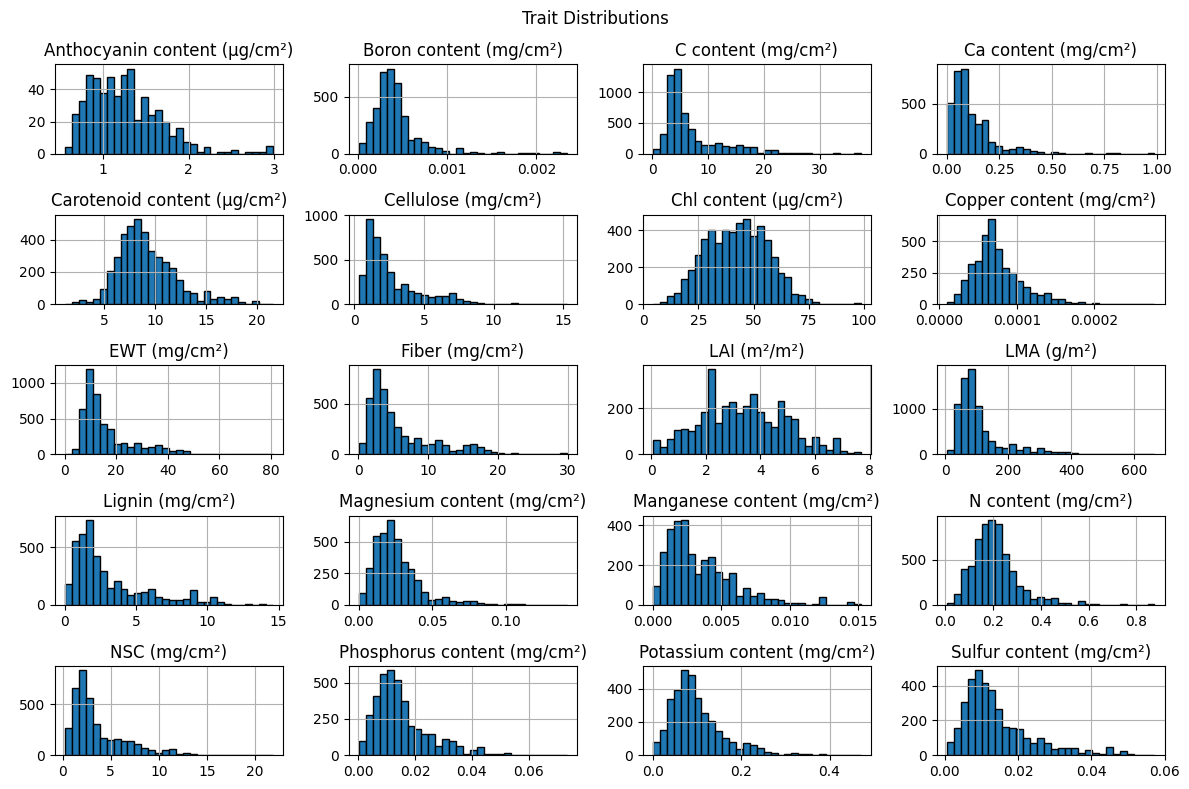

In [11]:
# Histograms for traits
df[traits].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle('Trait Distributions')
plt.tight_layout()
plt.show()

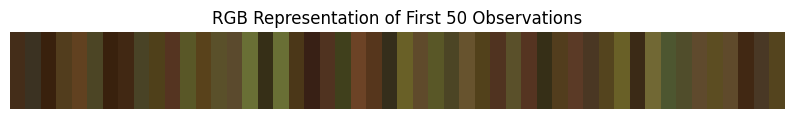

In [12]:
# Converting wavelengths to RGB, then visualize
wavelengths = bands.astype(int) # from '450' => 450

spectral_data = df[bands].values

# RGB range
def to_rgb(wmin, wmax): # RGB range
    return (wavelengths >= wmin) & (wavelengths <= wmax)

range_red = to_rgb(625, 740)  # https://en.wikipedia.org/wiki/Green
range_green = to_rgb(495, 570)# https://en.wikipedia.org/wiki/Green
range_blue = to_rgb(450, 495) # https://en.wikipedia.org/wiki/Blue

# Findind the RGB matrix
rgb_data = np.stack([
    np.nanmean(spectral_data[:, range_red], axis=1),
    np.nanmean(spectral_data[:, range_green], axis=1),
    np.nanmean(spectral_data[:, range_blue], axis=1)
], axis=1)

# Min-max normalization (0-1)
rgb_normalized = np.zeros_like(rgb_data)
for i in range(3):  # R, G, B
    channel = rgb_data[:, i]
    rgb_normalized[:, i] = (channel - np.nanmin(channel)) / (np.nanmax(channel) - np.nanmin(channel))

# Visualization for the first 50 Observations
plt.figure(figsize=(10, 1))
plt.imshow([rgb_normalized[0:50]], aspect='auto')
plt.title("RGB Representation of First 50 Observations")
plt.axis('off')
plt.show()

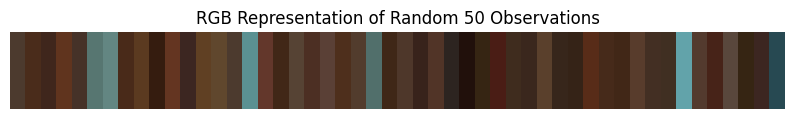

In [13]:
plt.figure(figsize=(10, 1))
plt.imshow([rgb_normalized[1300:1350]], aspect='auto')
plt.title("RGB Representation of Random 50 Observations")
plt.axis('off')
plt.show()